In [77]:
import numpy as np 
import matplotlib.pyplot as plt
import math
import random


In [152]:
#this function draws n samples based on the given mean and cov
def drawsample(mean,cov,n):
    data=[]
    for i in range(len(mean)):
        data.append(np.zeros(n))
    for i in range(n):
        pts=np.random.multivariate_normal(mean,cov)
        for j in range(len(data)):
            data[j][i]=pts[j]
    return data
#this function returns a set of points(x,y) whose x inputs are the coordinates and whose y are randomized 
def getpoints(mean,cov,num,xmin,xmax):
    data=drawsample(mean,cov,1)
    xpts=np.zeros(num)
    delta=(xmax-xmin)/num
    for i in range(len(xpts)):
        xpts[i]=xmin+delta*i
    return(xpts,data)
def random_with_training(xmax,xmin,num,sample):
    m=len(sample[0])
    y_sample=sample[1]
    xpts=np.zeros(num+m)
    delta=(xmax-xmin)/num
    for i in range(num):
        xpts[i]=xmin+i*delta
    for i in range(num,len(xpts)):
        xpts[i]=sample[0][i-num]
    cov=[]
    for i in range(len(xpts)):
        cov.append(np.zeros(len(xpts)))
        for j in range(len(xpts)):
            cov[i][j]=math.e**(-(xpts[i]-xpts[j])**2/8)
    #now we have the giant cov matrix, we need to divide up into the test cov and training cov
    #i use a to denote test, b to denote the given sample
    covaa=[]
    covab=[]
    covba=[]
    covbb=[]
    for i in range(num):
        covaa.append(np.zeros(num))
        covab.append(np.zeros(m))
    for j in range(m):
        covba.append(np.zeros(num))
        covbb.append(np.zeros(m))
    for i in range(len(xpts)):
        for j in range(len(xpts)):
            if (i<num):
                if (j<num):
                    covaa[i][j]=cov[i][j]
                else:
                    covab[i][j-num]=cov[i][j]
            else:    
                if (j<num):
                    covba[i-num][j]=cov[i][j]
                else:
                    covbb[i-num][j-num]=cov[i][j]
    covbb_i=np.linalg.inv(covbb)
    mean=np.dot(covab,np.dot(covbb_i,y_sample))
    final_cov=covaa-np.dot(covab,np.dot(covbb_i,covba))
    return(getpoints(mean,final_cov,num,xmin,xmax))


In [207]:
num=100
xmin=380
xmax=800
#led parameters
u1=450
s1=15
u2=570
s2=80
#incandescent parameters
c=1
k=1/100
#flourascent parameters
u3=435
s3=3.5
u4=490
s4=10
u5=550
s5=2.8
u6=580
s6=10
u7=620
s7=10


delta=(xmax-xmin)/num
x=np.zeros(num)
y_led=np.zeros(num)
#incandescent light bulb
y_in=np.zeros(num)
#flourescent light bulb
y_f=np.zeros(num)
for i in range(num):
    x[i]=xmin+delta*i
    if (x[i]>450):
        y_led[i]=(400/x[i])**(0.1)*30/(np.sqrt(2*3.14)*s1)*np.e**((-(x[i]-u1)**2)/(2*s1**2))
    else:
        y_led[i]=30/(np.sqrt(2*3.14)*s1)*np.e**((-(x[i]-u1)**2)/(2*s1**2))
    y_led[i]+=180/(np.sqrt(2*3.14)*s2)*np.e**((-(x[i]-u2)**2)/(2*s2**2))
    y_in[i]=c/(np.e**(-k*(x[i]-600))+1)
    y_f[i]+=1.2/(np.sqrt(2*3.14)*s3)*np.e**((-(x[i]-u3)**2)/(2*s3**2))
    y_f[i]+=4.4/(np.sqrt(2*3.14)*s4)*np.e**((-(x[i]-u4)**2)/(2*s4**2))
    y_f[i]+=(8)/(2*s5)*np.e**(-abs(x[i]-u5)/(2*s5))
    y_f[i]+=8/(2*s6)*np.e**(-abs(x[i]-u6)/(2*s6))
    y_f[i]+=24/(np.sqrt(2*3.14)*s7)*np.e**((-(x[i]-u7)**2)/(2*s7**2))


x_0=np.zeros(len(x)+5)
y_0=np.zeros(len(x)+5)
for i in range(len(x)):
    x_0[i]=x[i]
    y_0[i]=y_f[i]
x_0[len(x)]=705
y_0[len(x)]=0.06
x_0[len(x)+1]=707
y_0[len(x)+1]=0.07
x_0[len(x)+2]=708
y_0[len(x)+2]=0.08
x_0[len(x)+3]=710
y_0[len(x)+3]=0.1
x_0[len(x)+4]=715
y_0[len(x)+4]=0.08

sample=(x_0,y_0)
z1,z2=random_with_training(xmax,xmin,100,sample)


plt.show()

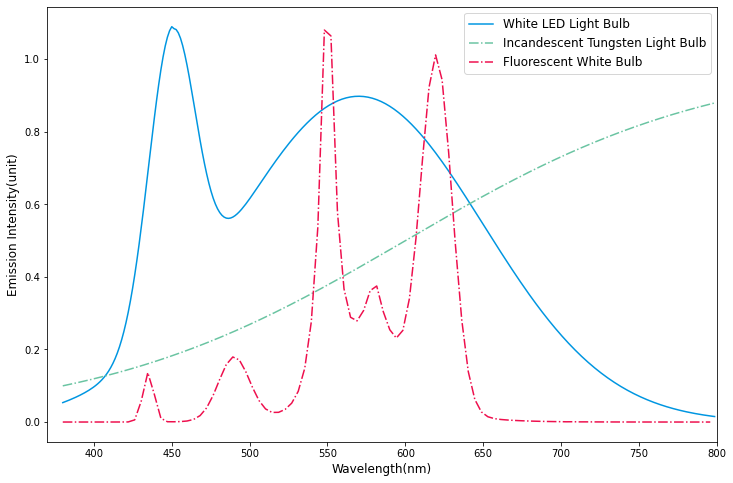

In [205]:
fig=plt.figure(figsize=[12,8])
ax=fig.add_subplot()
ax.plot(x,y_led,color="#0096E1",label="White LED Light Bulb")
ax.plot(x,y_in,'-.',color="#6AC4A2",label="Incandescent Tungsten Light Bulb")
ax.plot(z1,z2,'-.',color="#EE0F4D",label="Fluorescent White Bulb")
# ax.set_facecolor("#FFEEC6")
plt.xlim(370,800)
plt.xlabel("Wavelength(nm)",fontsize=12)
plt.ylabel("Emission Intensity(unit)", fontsize=12)
plt.legend(fontsize=12)
plt.title("")
plt.show()


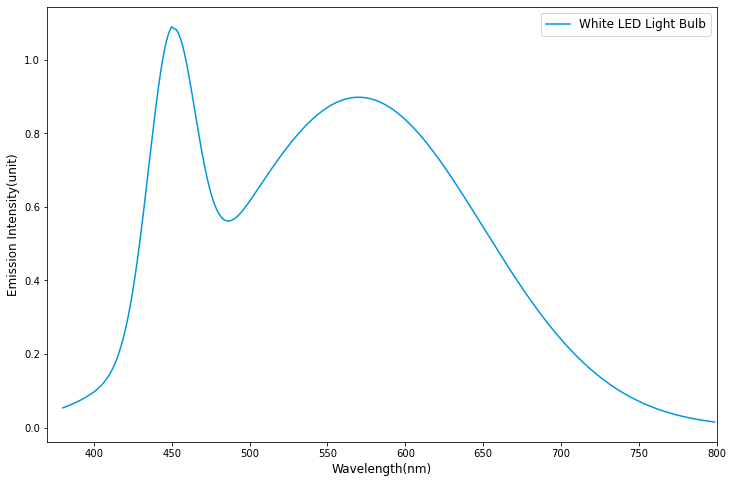

In [206]:
fig=plt.figure(figsize=[12,8])
ax=fig.add_subplot()
ax.plot(x,y_led,color="#0096E1",label="White LED Light Bulb")
# ax.set_facecolor("#FFEEC6")
plt.xlim(370,800)
plt.xlabel("Wavelength(nm)",fontsize=12)
plt.ylabel("Emission Intensity(unit)", fontsize=12)
plt.legend(fontsize=12)
plt.title("")
plt.show()

In [221]:
from scipy.integrate import quad
def integrand(x):
    if (x>450):
        y_led=(400/x)**(0.1)*30/(np.sqrt(2*3.14)*s1)*np.e**((-(x-u1)**2)/(2*s1**2))
    else:
        y_led=30/(np.sqrt(2*3.14)*s1)*np.e**((-(x-u1)**2)/(2*s1**2))
    y_led+=180/(np.sqrt(2*3.14)*s2)*np.e**((-(x-u2)**2)/(2*s2**2))
    return y_led
# y_new=np.zeros(num)
# for i in range(num):
#     y_new[i]=integrand(x[i])
# fig=plt.figure()
# ax=fig.add_subplot()
# ax.plot(x,y_new)
# plt.show()
total=197.42556074009596
result=[]
for i in range(6):
    result.append(quad(integrand,400+i*50,450+i*50)[0]/total*100)
print(result)


[12.154308864863586, 18.791381749519086, 19.203895968692343, 22.331897382416297, 17.799318706518655, 9.719197327992864]
